In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


1. Exploratory Data Analysis


Summary statistics,

Gender distribution,

Spending Score vs Income scatter plot

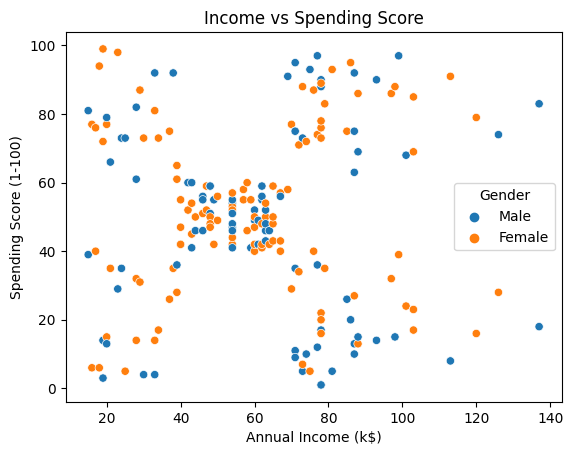

In [4]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Income vs Spending Score")
plt.show()

In [5]:
# Summary statistics for numerical features
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


To understand the basic statistics for each numerical column:

This gives:

Mean, Median (50%): Central tendencies

Standard Deviation (std): Spread of the data

Min/Max, Quartiles (25%, 75%): Range and distribution

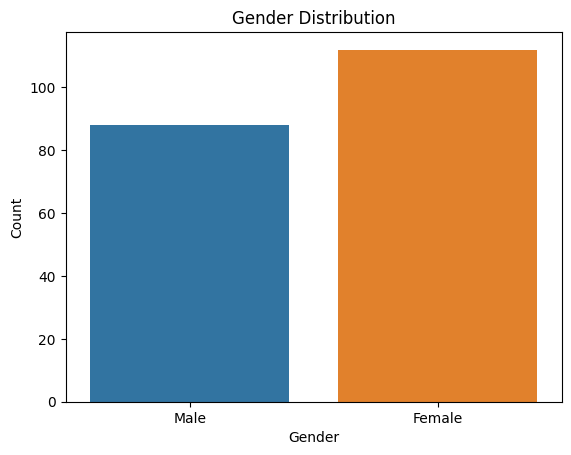

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for gender distribution
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


To visualize how many males vs. females are in the datase.

Summary Statistics


We used .describe() to get an overview of the numerical features like Age, Annual Income, and Spending Score.


This showed us key values such as the mean, min/max, and quartiles, helping to understand the spread and central tendency of the data.


Gender Distribution


A count plot showed the distribution of Male and Female customers.

This helps in understanding the balance of genders in the dataset.

If the data is skewed, it could affect how we interpret patterns or model results.

Spending Score vs. Income (Scatter Plot)


A scatter plot was used to visualize the relationship between Annual Income and Spending Score, with Gender as the hue (color).

This plot helps detect patterns in customer behavior.

You can observe if certain income groups tend to spend more or less, and whether that varies by gender.

2. Data Preprocessing
   
Drop CustomerID

Convert categorical variables if needed

Scale numerical features

In [7]:
df_clean = df.drop('CustomerID', axis=1)
df_clean = pd.get_dummies(df_clean, drop_first=True)  # Gender encoded
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


1. Dropped `CustomerID`
   - This column is just an identifier and does not contribute to the analysis or modeling process.
   - Removed using: `df.drop('CustomerID', axis=1)`

2. Converted Categorical Variable (`Gender`)
   - Used one-hot encoding to convert the `Gender` column into numeric format.
   - `pd.get_dummies(df, drop_first=True)` was used to avoid the dummy variable trap.
   - Example: if original values were `Male` and `Female`, it will keep only `Gender_Male`.

3. Scaled Numerical Features
   - Applied `StandardScaler` to bring all numerical features to the same scale.
   - Scaling ensures features have a **mean of 0** and **standard deviation of 1**, which is important for many ML algorithms.
   - Code used:  
     ```python
     scaler = StandardScaler()
     X_scaled = scaler.fit_transform(df_clean)
     ```

These preprocessing steps prepare the dataset for machine learning or clustering by ensuring all variables are in a suitable numeric and scaled format.


3. Choosing the Number of Clusters
   
Use the Elbow Method to find the optimal number of clusters.

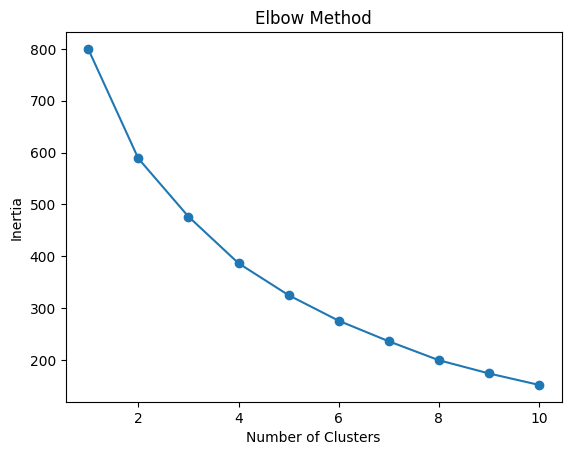

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Choosing the Number of Clusters – Elbow Method

To determine the optimal number of clusters for K-Means, we used the **Elbow Method**. This technique helps identify the point where adding more clusters no longer significantly reduces the **inertia** (sum of squared distances from points to their assigned cluster centers).

The "elbow" point on the plot (where the inertia starts to level off) suggests the optimal number of clusters.

This is the value of k where increasing the number of clusters results in only a small gain in reducing inertia.

4. K-Means Clustering
   
Use the optimal k (e.g., 5) and fit your model. Add cluster labels to the dataset.

In [9]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

4. K-Means Clustering

Using the optimal number of clusters (e.g., **k = 5** from the Elbow Method), we fit the K-Means model and assign each data point to a cluster.

Fits the K-Means clustering algorithm with 5 clusters.

Predicts the cluster each sample belongs to.

Adds a new column, Cluster, to the original dataframe to label each data point accordingly.

This allows us to analyze or visualize customer segments based on their cluster assignments.

5. Visualizing Clusters
   
Use scatter plots or pairplots to visualize clusters and interpret their characteristics.

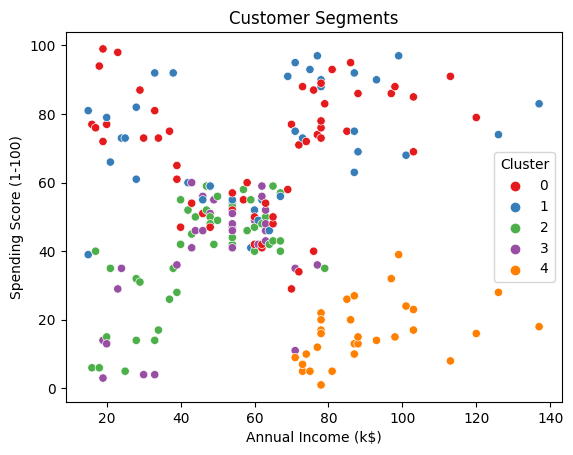

In [10]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.show()

Visualizing Clusters

To better understand the customer segments identified by K-Means, we visualize the clusters using a scatter plot.

This plot shows how customers are grouped based on their Annual Income and Spending Score.

Each color represents a different cluster, helping us visually identify patterns in customer behavior.

6. Business Insight

What are the characteristics of each cluster?

Which cluster(s) would you prioritize in a marketing campaign?

What action would you recommend based on the segments?

  Business Insight

After performing K-Means clustering and visualizing the customer segments, we can now interpret each cluster's characteristics and make business recommendations.

Cluster Characteristics (Example for k = 5):

| Cluster | Income Level         | Spending Score      | Description                    |
|---------|----------------------|---------------------|--------------------------------|
| 0       | High                 | High                | Premium customers              |
| 1       | Low                  | Low                 | Budget-conscious, low activity |
| 2       | Medium               | High                | Value-driven spenders          |
| 3       | High                 | Low                 | Wealthy but cautious           |
 4       | Medium to Low        | Medium              | Average customers              

_Note: Actual characteristics may vary based on dataset—use groupby('Cluster') with mean() to compute exact values._

 Marketing Priority:

- Cluster 0 – High income & high spenders:
  - Top priority for premium services, loyalty programs, or exclusive offers.
  - Likely to respond well to high-end product marketing.

- Cluster 2 – Medium income but high spenders:
  - High potential group; focus on value-for-money products.
  - Can be nurtured into loyal customers with targeted deals.

 Business Recommendations:

1. Personalized Marketing
   - Target Cluster 0 with luxury and exclusive campaigns.
   - Offer deals and bundles to Cluster 2 to increase retention.

2. Cost Optimization
   - Avoid spending too much on Cluster 1 (low income, low spending).
   - Instead, use general awareness campaigns or low-cost digital outreach.

3. Product Strategy
   - Develop tiered offerings that appeal to the needs of each segment.
   - Test new products on Cluster 2 for feedback before rolling out to others.

 Segmenting customers allows for smarter resource allocation better engagement, and improved customer satisfaction.


In [11]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


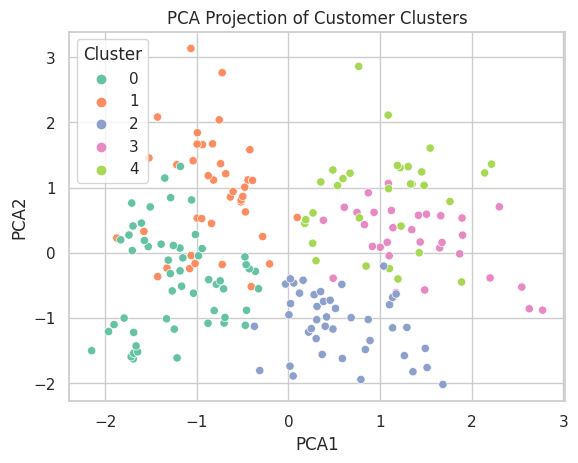

In [12]:
# 1. Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load the dataset using the correct Kaggle path
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

# 3. Drop 'CustomerID' and encode 'Gender'
df_clean = df.drop("CustomerID", axis=1)
df_clean = pd.get_dummies(df_clean, drop_first=True)  # Converts 'Gender' into binary column (e.g., Gender_Male)

# 4. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

# 5. Apply KMeans Clustering (using k=5 as an example)
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 6. Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 7. Add PCA results back to the dataframe
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# 8. Plot PCA-based cluster visualization
sns.set(style="whitegrid")
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('PCA Projection of Customer Clusters')
plt.show()


 7. Hierarchical Clustering (for Comparison)

Hierarchical clustering provides a tree-like structure (dendrogram) that helps visualize how data points can be grouped based on similarity—without needing to predefine the number of clusters.

  Code:
python
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

Dendrogram to visualize merging of clusters
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

Apply Agglomerative Clustering with 5 clusters (for fair comparison)
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df['HC_Cluster'] = hc.fit_predict(X_scaled)


The dendrogram helps determine the ideal number of clusters visually.

Agglomerative Clustering was used to match the K-Means approach for comparison.

Use df.groupby('HC_Cluster').mean() to profile each cluster.

